<a href="https://colab.research.google.com/github/mohsenmolaei/causality_blockchain_group/blob/main/var_lingam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# !pip install lingam
# !pip install igraph
# !pip install pygam
# !pip install factor_analyzer

import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot, print_causal_directions, print_dagc
import matplotlib.pyplot as plt
import seaborn as sns


print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])
np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.21.6', '1.3.5', '0.10.1', '1.7.0']


In [8]:
#%%
B0 = [
[0,-0.12,0,0,0],
[0,0,0,0,0],
[-0.41,0.01,0,-0.02,0],
[0.04,-0.22,0,0,0],
[0.15,0,-0.03,0,0],
]
B1 = [
[-0.32,0,0.12,0.32,0],
[0,-0.35,-0.1,-0.46,0.4],
[0,0,0.37,0,0.46],
[-0.38,-0.1,-0.24,0,-0.13],
[0,0,0,0,0],
]
causal_order = [1, 0, 3, 2, 4]
# data generated from B0 and B1
X = pd.read_csv('/content/features.csv')
X.set_index("time_stamp",inplace=True,drop=True)


In [28]:
#%%
model = lingam.VARLiNGAM()
model.fit(X)


#%%
model.causal_order_

#%%
model.adjacency_matrices_[0]

model.adjacency_matrices_[1]

model.residuals_

dlingam = lingam.DirectLiNGAM()
dlingam.fit(model.residuals_)
dlingam.adjacency_matrix_

temp = pd.DataFrame(dlingam.adjacency_matrix_)
temp.to_csv("lingam_res_blockchain")

In [13]:
#%%
labels = ['x0(t)', 'x1(t)', 'x2(t)', 'x3(t)', 'x4(t)', 'x0(t-1)', 'x1(t-1)', 'x2(t-1)', 'x3(t-1)', 'x4(t-1)']
make_dot(np.hstack(model.adjacency_matrices_), ignore_shape=True, lower_limit=0.05,labels=labels)

#%%
p_values = model.get_error_independence_p_values()
print(p_values)

ValueError: ignored

ValueError: ignored

In [ ]:
#%%
model = lingam.VARLiNGAM()
result = model.bootstrap(X, n_sampling=100)

#%%
cdc = result.get_causal_direction_counts(n_directions=8, min_causal_effect=0.3, split_by_causal_effect_sign=True)

#%%
print_causal_directions(cdc, 100, labels=labels)

#%%
dagc = result.get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.2,split_by_causal_effect_sign=True)

#%%
print_dagc(dagc, 100, labels=labels)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing

[[0.         0.06504345 0.20804355 0.03768508 0.24924748]
 [0.06504345 0.         0.26266312 0.87990763 0.57010673]
 [0.20804355 0.26266312 0.         0.3663808  0.33978708]
 [0.03768508 0.87990763 0.3663808  0.         0.83924721]
 [0.24924748 0.57010673 0.33978708 0.83924721 0.        ]]


Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False 

x0(t) <--- x0(t-1) (b<0) (100.0%)
x1(t) <--- x1(t-1) (b<0) (100.0%)
x1(t) <--- x3(t-1) (b<0) (100.0%)
x1(t) <--- x4(t-1) (b>0) (100.0%)
x2(t) <--- x0(t) (b<0) (100.0%)
x2(t) <--- x2(t-1) (b>0) (100.0%)
x2(t) <--- x4(t-1) (b>0) (100.0%)
x3(t) <--- x0(t-1) (b<0) (100.0%)
DAG[0]: 60.0%
	x0(t) <--- x0(t-1) (b<0)
	x0(t) <--- x3(t-1) (b>0)
	x1(t) <--- x1(t-1) (b<0)
	x1(t) <--- x3(t-1) (b<0)
	x1(t) <--- x4(t-1) (b>0)
	x2(t) <--- x0(t) (b<0)
	x2(t) <--- x2(t-1) (b>0)
	x2(t) <--- x4(t-1) (b>0)
	x3(t) <--- x1(t) (b<0)
	x3(t) <--- x0(t-1) (b<0)
	x3(t) <--- x2(t-1) (b<0)
DAG[1]: 39.0%
	x0(t) <--- x0(t-1) (b<0)
	x0(t) <--- x3(t-1) (b>0)
	x1(t) <--- x1(t-1) (b<0)
	x1(t) <--- x3(t-1) (b<0)
	x1(t) <--- x4(t-1) (b>0)
	x2(t) <--- x0(t) (b<0)
	x2(t) <--- x2(t-1) (b>0)
	x2(t) <--- x4(t-1) (b>0)
	x3(t) <--- x0(t-1) (b<0)
	x3(t) <--- x2(t-1) (b<0)
DAG[2]: 1.0%
	x0(t) <--- x0(t-1) (b<0)
	x0(t) <--- x3(t-1) (b>0)
	x1(t) <--- x1(t-1) (b<0)
	x1(t) <--- x3(t-1) (b<0)
	x1(t) <--- x4(t-1) (b>0)
	x2(t) <--- x0(t) (

(array([ 3.,  2.,  8., 21., 13., 22., 11.,  7., 10.,  3.]),
 array([0.21474115, 0.23388116, 0.25302117, 0.27216119, 0.2913012 ,
        0.31044122, 0.32958123, 0.34872124, 0.36786126, 0.38700127,
        0.40614128]),
 <a list of 10 Patch objects>)

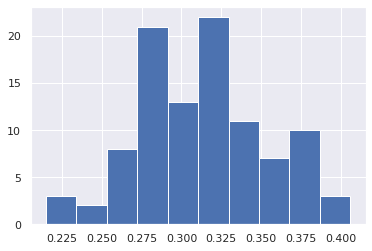

In [3]:






#%%
prob = result.get_probabilities(min_causal_effect=0.1)
print('Probability of B0:\n', prob[0])
print('Probability of B1:\n', prob[1])

#%%
causal_effects = result.get_total_causal_effects(min_causal_effect=0.01)
df = pd.DataFrame(causal_effects)
df['from'] = df['from'].apply(lambda x : labels[x])
df['to'] = df['to'].apply(lambda x : labels[x])
df

#%%
df.sort_values('effect', ascending=False).head()
df[df['to']=='x1(t)'].head()

#%%

sns.set()
# %matplotlib inline
from_index = 7 # index of x2(t-1). (index:2)+(n_features:5)*(lag:1) = 7
to_index = 2 # index of x2(t). (index:2)+(n_features:5)*(lag:0) = 2
plt.hist(result.total_effects_[:, to_index, from_index])